<a href="https://colab.research.google.com/github/AryaJ3365/Investment-Prediction-Application/blob/main/Investment_Prediction_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Investment Prediction App featuring Scikit-Learn**

##**Load Data**

###Import various needed python packages such as scikit-learn, pandas, and seaborn

Scikit-learn is what provides us the capabilities to build our own standalone machine learning environment based on the data we feed it. This application will use a Random Forest Classifier as it's main model. Pandas package will be needed to allow me to manipulate the data as needed.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Here we read in the CSV file that contains examples of past successful and unsuccessful investments to train the machine learning environment that I created through online research. Note: In the future I hope to create using startup investment data gathered fully through WiProsper.

In [ ]:
investmentDF = pd.read_csv("https://raw.githubusercontent.com/AryaJ3365/Datasets/main/regression.csv")

##**Data Preparation**

###Analysis of the data

First we look through the head of the data set which essentially is just showing us how the first five rows of the data set look like.

Here is the key for the data set:

1.   Investment: Total dollars invested (USD)
2.   Time: Short-term = 1, Long-term = 2
3.   Skill: Low = 1, Medium = 2, High = 3
4.   Impact: Low = 1, Medium = 2, High = 3
5.   Successful: No = 0, Yes = 1



In [ ]:
investmentDF.head()

,Investment,Time,Skill,Impact,Successful
0,10000,2,3,3,1
1,15000,1,2,3,1
2,20000,2,1,1,0
3,25000,1,3,1,0
4,5000,2,2,3,1


Next, we use the info() command to figure out the data type each column is using, since we are primarily using linear regression and random forest models we would like for our data types to either be an integer (whole number) or a float (decimal).

In [ ]:
investmentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Investment  70 non-null     int64
 1   Time        70 non-null     int64
 2   Skill       70 non-null     int64
 3   Impact      70 non-null     int64
 4   Successful  70 non-null     int64
dtypes: int64(5)
memory usage: 2.9 KB


Next we use the isnull() command to verify that there is no null values (values with nothing in it) that may accidentally change the results we are looking for. Good thing here as we can see below is there are no null values in any of the columns.

In [ ]:
investmentDF.isnull().sum()

Investment    0
Time          0
Skill         0
Impact        0
Successful    0
dtype: int64

Since, in this scenario our successful column can only have two values: 1 (buisness is successful) or 0 (buisness is not successful) we are able to continue with the process of starting the Machine Learning Model. If there were multiple values we would have needed to use a label encoder.

In [ ]:
investmentDF['Successful'].value_counts()

1    41
0    29
Name: Successful, dtype: int64

Data separation as X and y.

In [ ]:
X = investmentDF.drop('Successful', axis = 1)
y = investmentDF['Successful']

###Data Splitting

We have decided a test size of 0.2 which means our test data set will contain 20% of the values and our training data set will contain the other 80% of the values. This is important since if follows the correct procedures for Machine Learning data feeding.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Standard scaling is used in order for us to get more optimized results.

In [ ]:
sc = StandardScaler()

Applying standard scaling to our testing data set and our training data set.

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##**Model Building**

###**Random Forest Classifier**

Training and applying the model in order to allows us to make a prediction.

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Classifaction report results of our model's performance using the Random Forest Classifier model.

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.78      1.00      0.88         7

    accuracy                           0.86        14
   macro avg       0.89      0.86      0.85        14
weighted avg       0.89      0.86      0.85        14



Confusion matrix results shows the number of true positives (TP) and true negatives (TN) that we are seeing within our data set.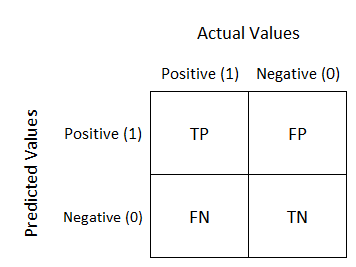

In [20]:
print(confusion_matrix(y_test, pred_rfc))

[[5 2]
 [0 7]]


These commands show us the accuracy of the random forest classifier which gives us an accuracy of 86%, however will go much higher once more data is added into the data set.

In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.8571428571428571

##**Investment Prediction**

###Dataset Information and Rules

Bringing back the head of the CSV so we know the columns needed to set up our investment that we are trying to predict if it will be successful.

Once again here is the key for the data set:

1.   Investment: Total dollars invested (USD)
2.   Time: Short-term = 1, Long-term = 2
3.   Skill: Low = 1, Medium = 2, High = 3
4.   Impact: Low = 1, Medium = 2, High = 3
5.   Successful: No = 0, Yes = 1



In [ ]:
investmentDF.head(10)

,Investment,Time,Skill,Impact,Successful
0,10000,2,3,3,1
1,15000,1,2,3,1
2,20000,2,1,1,0
3,25000,1,3,1,0
4,5000,2,2,3,1
5,7500,2,3,1,0
6,35000,2,2,2,1
7,5000,1,3,1,0
8,30000,2,1,2,1
9,2000,1,3,1,0


###Data Entry

Within the Xnew line in our code in between each comma type in the data of the four features you are looking at using the above key and snippet of the data set as a guide. The Xnew line should be structured like this:

**Xnew = [Investment, Time, Skill, Impact]**



In [ ]:
#Enter your investment data (information) here.
Xnew = [[50000, 2, 3, 3]]

ynew = rfc.predict(Xnew)

This line will output whether the buisness above is either predicted to be successful or unsuccessful.



In [22]:
if(ynew == 1):
  print("The investment is predicted to be successful.")
else:
  print("The investment is predicted to be unsuccessful")
print(ynew)

The investment is predicted to be successful.
[1]
